In [3]:
from gensim import models

In [4]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(x, y):
    return dot(x, y) / (norm(x) * norm(y))

print(cos_sim([1, 0, 0], (1, 0, 0)))
print(cos_sim([1, 0, 0], (0, 1, 0)))
print(cos_sim([1, 0, 0], (-1, 0, 0)))

1.0
0.0
-1.0


In [4]:
!wget https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data/raw/refs/heads/master/simpsons_script_lines.csv.zip -O simpsons_script_lines.csv.zip

--2025-11-11 15:13:20--  https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data/raw/refs/heads/master/simpsons_script_lines.csv.zip
Распознаётся github.com (github.com)… 140.82.121.4
Подключение к github.com (github.com)|140.82.121.4|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/sujanjoejacob/Text-mining-with-Simpsons-Data/refs/heads/master/simpsons_script_lines.csv.zip [переход]
--2025-11-11 15:13:21--  https://raw.githubusercontent.com/sujanjoejacob/Text-mining-with-Simpsons-Data/refs/heads/master/simpsons_script_lines.csv.zip
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 9163442 (8,7M) [application/zip]
Сохранение в: ‘simpsons_script_lines.csv.zip’

simpso

In [5]:
!unzip simpsons_script_lines.csv.zip

Archive:  simpsons_script_lines.csv.zip
  inflating: simpsons_script_lines.csv  


In [11]:
import pandas as pd

In [50]:
ds  = pd.read_csv('simpsons_script_lines.csv', sep=',', on_bad_lines='skip', low_memory=False)
ds.dropna(inplace = True)

In [51]:
ds[['normalized_text','raw_character_text']].head()

,normalized_text,raw_character_text
0,no actually it was a little of both sometimes ...,Miss Hoover
1,wheres mr bergstrom,Lisa Simpson
2,i dont know although id sure like to talk to h...,Miss Hoover
3,that life is worth living,Lisa Simpson
4,the polls will be open from now until the end ...,Edna Krabappel-Flanders


In [37]:
from gensim import models

In [52]:
sentences = []
for i, row in ds.iterrows():
    #print(row['normalized_text'])
    sentences.append(row['normalized_text'].split(' '))


In [ ]:
#Обучить word2vec на фразах персонажей

In [53]:
model = models.FastText(sentences, sg=1, vector_size=50)

In [54]:
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(4760877, 6509900)

In [ ]:
#Визуализировать embeddings по самым частотным словам (top 1000)

In [69]:
from sklearn.manifold import TSNE

words_wp = []
embeddings_wp = []
for word in model.wv.index_to_key[:1000]:
    embeddings_wp.append(model.wv[word])
    words_wp.append(word)
print(len(embeddings_wp))    
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', random_state=12, max_iter=1000)
e3d = tsne_wp_3d.fit_transform(np.array(embeddings_wp))

1000


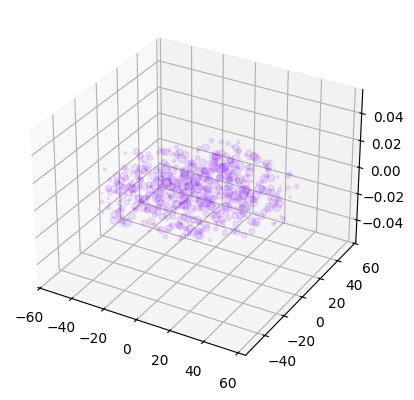

In [74]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
colors = cm.rainbow(np.linspace(0, 1, 1))
plt.scatter(e3d[:, 0], e3d[:, 1], e3d[:, 2], c=colors, alpha=0.1)

plt.show()

In [ ]:
#Найти самые близкие слова для:4
#homer - marge + bart
#bart - lisa + school
#marge - homer + home

In [57]:
print('homer - marge + bart')
print(model.wv.most_similar(positive=['homer','bart'], negative=['marge'], topn=5))

homer - marge + bart
[('grampa', 0.7671828269958496), ('barto', 0.7535901069641113), ('simpson', 0.75063556432724), ('nelson', 0.7495116591453552), ('bart-dude', 0.7455706000328064)]


In [58]:
print('bart - lisa + school')
print(model.wv.most_similar(positive=['homer','bart'], negative=['marge'], topn=5))

bart - lisa + school
[('grampa', 0.7671828269958496), ('barto', 0.7535901069641113), ('simpson', 0.75063556432724), ('nelson', 0.7495116591453552), ('bart-dude', 0.7455706000328064)]


In [59]:
print('marge - homer + home')
print(model.wv.most_similar(positive=['marge','home'], negative=['homer'], topn=5))

marge - homer + home
[('sleep', 0.7595093250274658), ('moes', 0.7452017068862915), ('bed', 0.7293890118598938), ('back', 0.7273067831993103), ('sleepover', 0.7220022082328796)]
